# **Import the Necessary Dependencies**

In [ ]:
# 1: Import the Necessary Dependencies
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# Read and Load the Dataset


In [ ]:

DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/test_tweets_anuFYb8.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
9655,41617,when you order your @user pizza 2 hours ago......,NaN,NaN,NaN,NaN
11792,43754,@user me and my sis about to do #imaceleb maze...,NaN,NaN,NaN,NaN
7737,39699,#lol as am so enjoying #decluttering i've go...,NaN,NaN,NaN,NaN
14192,46154,love island host caroline flack sings 'happy...,NaN,NaN,NaN,NaN
4048,36010,"fulfilldaily: ""if you want to be , set a goa...",NaN,NaN,NaN,NaN


# **Exploratory Data Analysis**

In [ ]:
df.head()

,target,ids,date,flag,user,text
0,id,tweet,NaN,NaN,NaN,NaN
1,31963,#studiolife #aislife #requires #passion #dedic...,NaN,NaN,NaN,NaN
2,31964,@user #white #supremacists want everyone to s...,NaN,NaN,NaN,NaN
3,31965,safe ways to heal your #acne!! #altwaystohe...,NaN,NaN,NaN,NaN
4,31966,is the hp and the cursed child book up for res...,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [ ]:
print('length of data is', len(df))

length of data is 17198


In [ ]:
df. shape

(17198, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17198 entries, 0 to 17197
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  17198 non-null  object 
 1   ids     17198 non-null  object 
 2   date    0 non-null      float64
 3   flag    0 non-null      float64
 4   user    0 non-null      float64
 5   text    0 non-null      float64
dtypes: float64(4), object(2)
memory usage: 806.3+ KB


In [ ]:
df.dtypes

,0
target,object
ids,object
date,float64
flag,float64
user,float64
text,float64


In [ ]:
np.sum(df.isnull().any(axis=1))

17198

In [ ]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   17198


In [ ]:
df['target'].unique()

array(['id', '31963', '31964', ..., '49157', '49158', '49159'],
      dtype=object)

In [ ]:
df['target'].nunique()

17198

# **Data Visualization of TargetVariables**

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


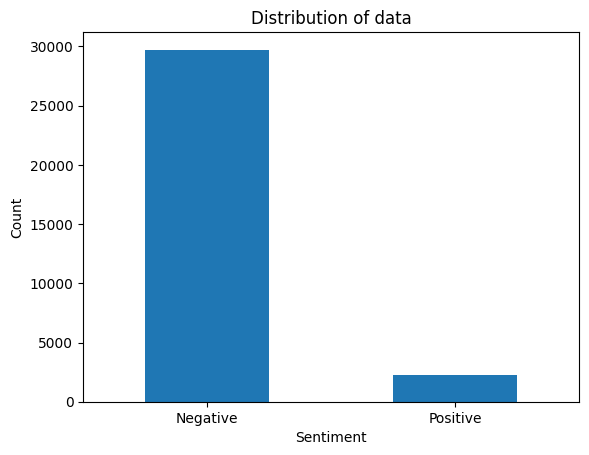

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading your DataFrame from a CSV file.
df = pd.read_csv('/content/train_E6oV3lV.csv')

print(df.head())  # This will help you see if 'text' and 'target' columns are correct

ax = df.groupby('label').size().plot(kind='bar', title='Distribution of data', legend=False)
ax.set_xticklabels(['Negative', 'Positive'], rotation=0)

# Show the plot
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

text, sentiment = list(df['tweet']), list(df['label'])

Index(['id', 'label', 'tweet'], dtype='object')


<Axes: xlabel='label', ylabel='count'>

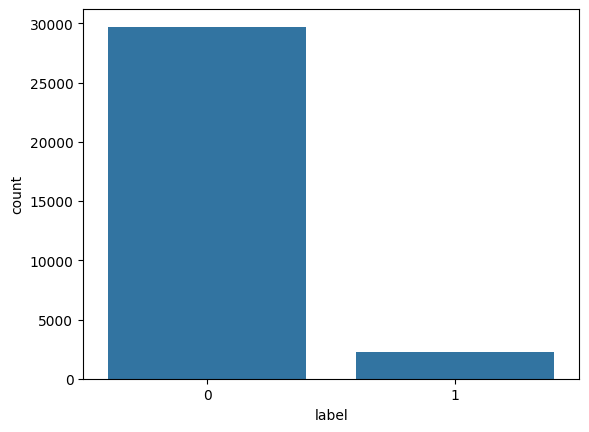

In [ ]:
import seaborn as sns
import pandas as pd

# Loading your DataFrame from a CSV file.
df = pd.read_csv('/content/train_E6oV3lV.csv')

# Check the actual column names in your dataframe
print(df.columns)

# Assuming the column is named 'label' based on your previous code
sns.countplot(x='label', data=df)  # Change 'target' to 'label' if it's the correct column name

Data **Preprocessing**

In [ ]:
data = df[['tweet', 'label']]

In [ ]:
data['label'] = data['label'].replace(4,1)

<ipython-input-32-f0cdba724ae9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].replace(4,1)


In [ ]:
data['label'].unique()

array([0, 1])

In [ ]:
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

In [ ]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(30000)]

In [ ]:

data = data.rename(columns={'tweet': 'text'})

# Now proceed with subsetting and concatenating to create 'dataset'
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(30000)]
dataset = pd.concat([data_pos, data_neg])

# Your code should now work as expected
my_text_list = text


dataset['text'] = dataset['text'].str.lower()
dataset['text'].tail()

,text
31956,off fishing tomorrow @user carnt wait first ti...
31957,ate @user isz that youuu?ðððððð...
31958,to see nina turner on the airwaves trying to...
31959,listening to sad songs on a monday morning otw...
31961,thank you @user for you follow


In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

,text
13,@user #cnn calls #michigan middle school 'buil...
14,no comment! #australia #opkillingbay #seasheph...
17,retweet agree!
23,@user @user lumpy says . prove lumpy.
34,it's unbelievable 21st century we'd need somet...


In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

,text
31956,off fishing tomorrow user carnt wait first tim...
31957,ate user isz youuuððððððð...
31958,see nina turner airwaves trying wrap mantle ge...
31959,listening sad songs monday morning otw work sad
31961,thank user follow


In [ ]:
import re

def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)  # Corrected regex pattern

# Apply the function to your dataset
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

,text
31956,of fishing tomorow user carnt wait first time ...
31957,ate user isz youðððððððð...
31958,se nina turner airwaves trying wrap mantle gen...
31959,listening sad songs monday morning otw work sad
31961,thank user folow


In [ ]:
import re

def cleaning_URLs(data):
    return re.sub(r'http\S+', '', data)

dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

,text
31956,of fishing tomorow user carnt wait first time ...
31957,ate user isz youðððððððð...
31958,se nina turner airwaves trying wrap mantle gen...
31959,listening sad songs monday morning otw work sad
31961,thank user folow


In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

,text
31956,of fishing tomorow user carnt wait first time ...
31957,ate user isz youðððððððð...
31958,se nina turner airwaves trying wrap mantle gen...
31959,listening sad songs monday morning otw work sad
31961,thank user folow


In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer

nltk.download('punkt') # Download necessary data for tokenization
!pip install nltk


tokenizer = RegexpTokenizer(r'\w+')  # Corrected regex pattern

dataset['text'] = dataset['text'].apply(lambda x: tokenizer.tokenize(str(x))) # Convert to string if not already
dataset['text'].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,text
13,[w]
14,[]
17,[w]
23,[]
34,[w]


In [ ]:
import nltk
st = nltk.PorterStemmer()

def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text  # Return the stemmed text

dataset['text'] = dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

,text
13,[w]
14,[]
17,[w]
23,[]
34,[w]


In [ ]:
import nltk
# Download the 'wordnet' dataset
nltk.download('wordnet')

lm = nltk.WordNetLemmatizer()

def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text  # Return the modified list

dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,text
13,[w]
14,[]
17,[w]
23,[]
34,[w]


In [ ]:
X=data.text
y=data.label

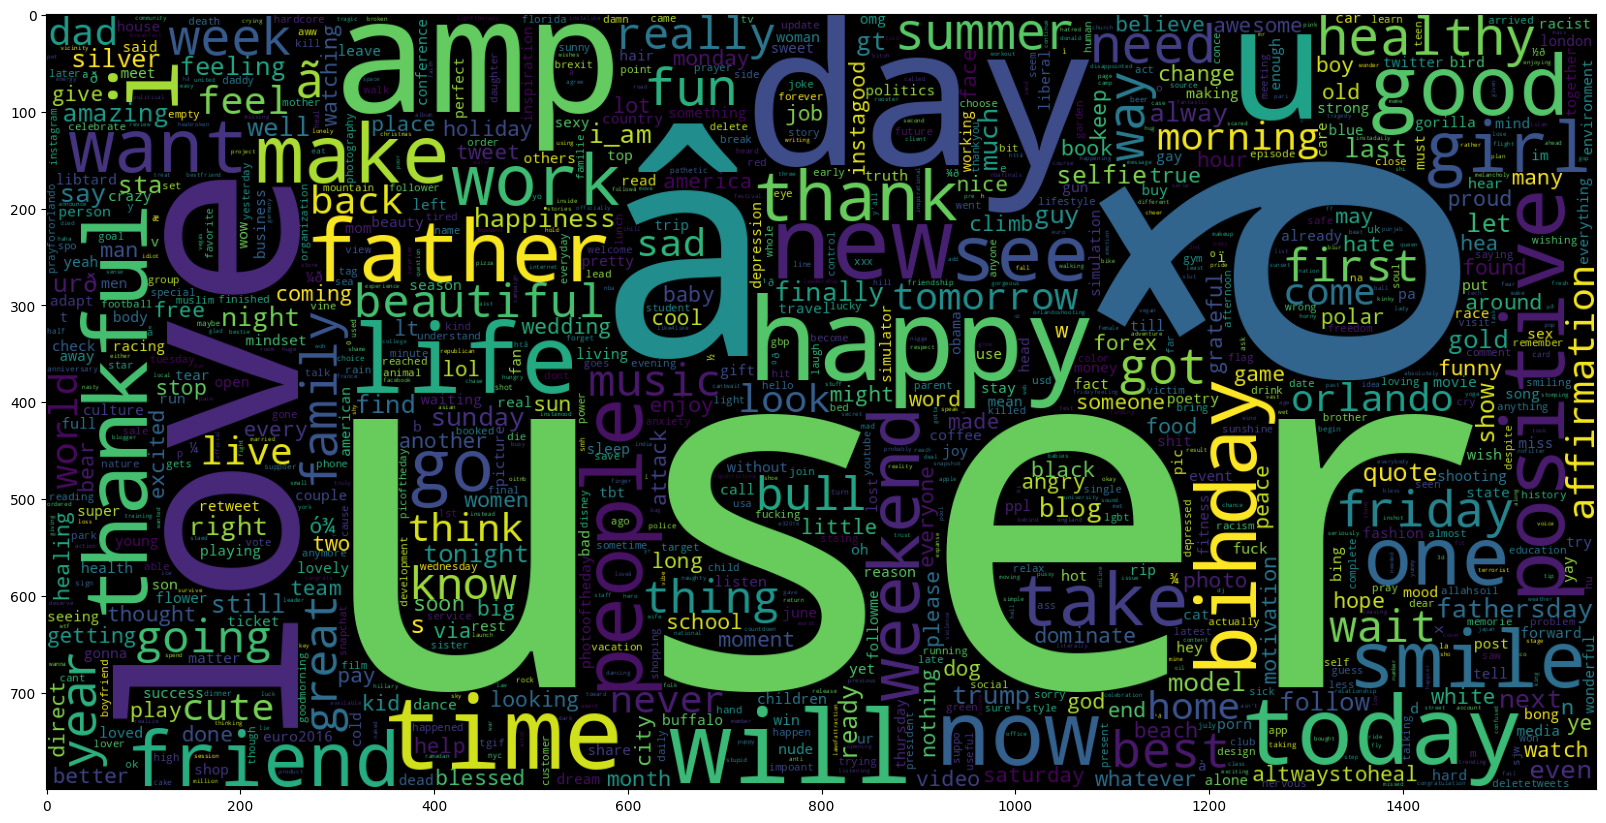

In [ ]:
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

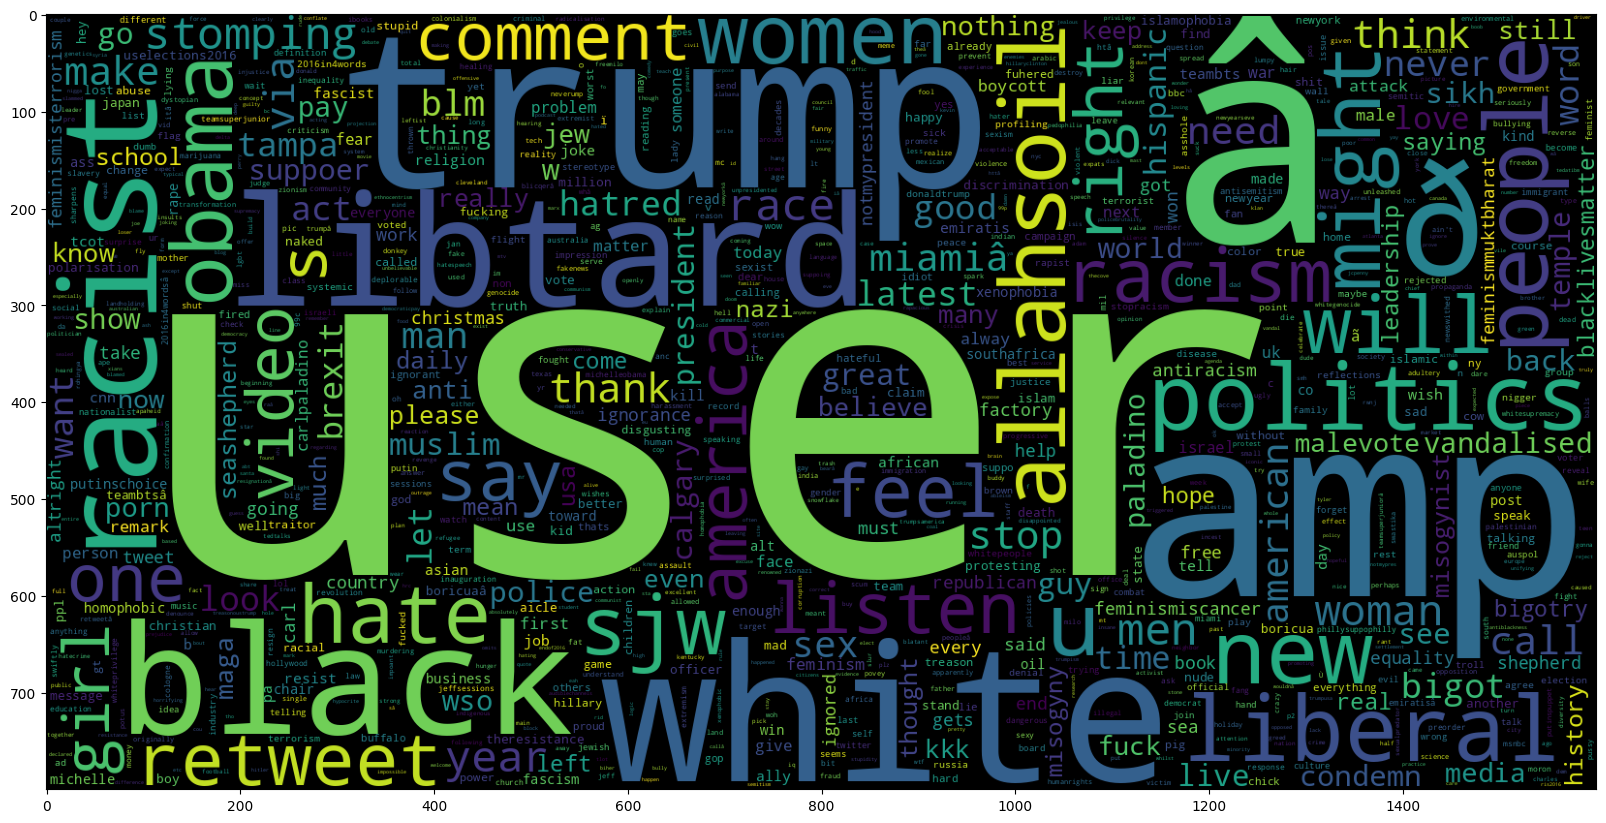

In [ ]:
# Ensure you are slicing within the valid range of your DataFrame
data_pos = data['text'][data['label'] == 1]  # Assuming 'label' column indicates positive sentiment

# Check if positive sentiment data exists before proceeding
if len(data_pos) == 0:
    print("No positive sentiment data found. Unable to create word cloud.")
else:
    # If positive sentiment data exists, create a word cloud for it
    wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_pos))
    plt.figure(figsize=(20, 20))
    plt.imshow(wc)
    plt.show()

# **Splitting Our Data Into Train and Test Subsets**

In [ ]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

# **Transforming the Dataset Using TF-IDF Vectorizer**

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  219357


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

# **Function for Model Evaluation**

After training the model, we then apply the evaluation measures to check how the model is performing. Accordingly, we use the following evaluation parameters to check the performance of the models respectively:

Accuracy Score,
Confusion Matrix with Plot,
ROC-AUC Curve

In [ ]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
            xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# **Model Building**

In the problem statement, we have used three different models respectively :

Bernoulli Naive Bayes Classifier
SVM (Support Vector Machine)
Logistic Regression
The idea behind choosing these models is that we want to try all the classifiers on the dataset ranging from simple ones to complex models, and then try to find out the one which gives the best performance among them.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1490
           1       0.00      0.00      0.00       109

    accuracy                           0.93      1599
   macro avg       0.47      0.50      0.48      1599
weighted avg       0.87      0.93      0.90      1599



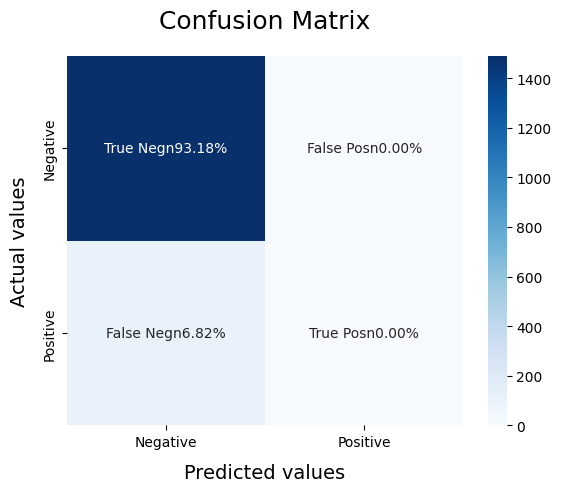

In [ ]:
# M1
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

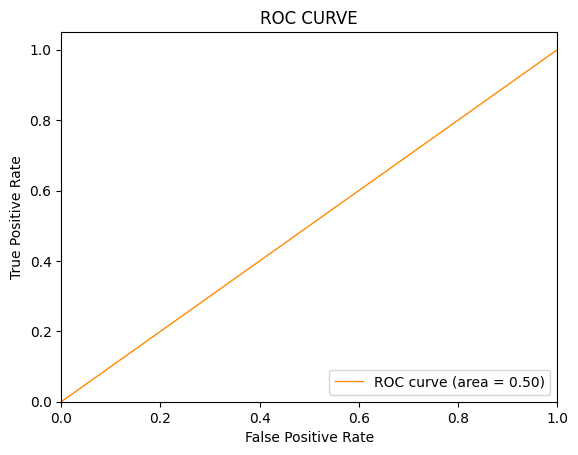

In [ ]:
# ROC-AUC Curve for model-1
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1490
           1       0.90      0.58      0.70       109

    accuracy                           0.97      1599
   macro avg       0.93      0.79      0.84      1599
weighted avg       0.97      0.97      0.96      1599



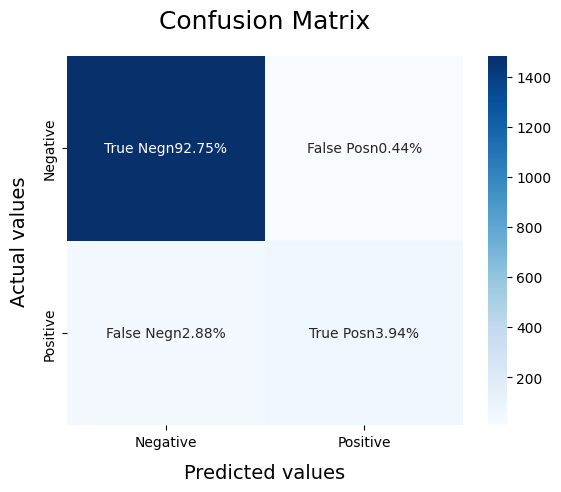

In [ ]:
# M2
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

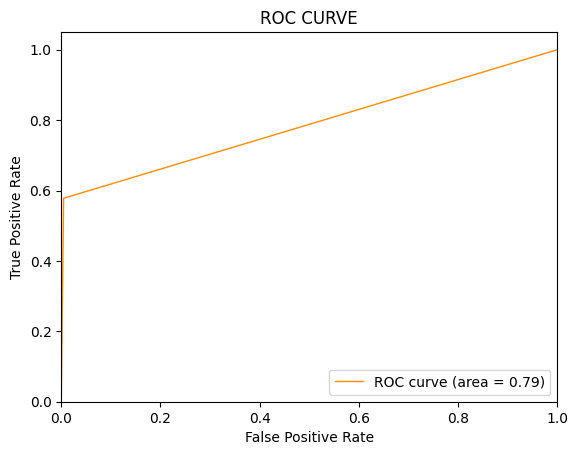

In [ ]:
# ROC-AUC Curve for model-2

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1490
           1       0.91      0.29      0.44       109

    accuracy                           0.95      1599
   macro avg       0.93      0.65      0.71      1599
weighted avg       0.95      0.95      0.94      1599



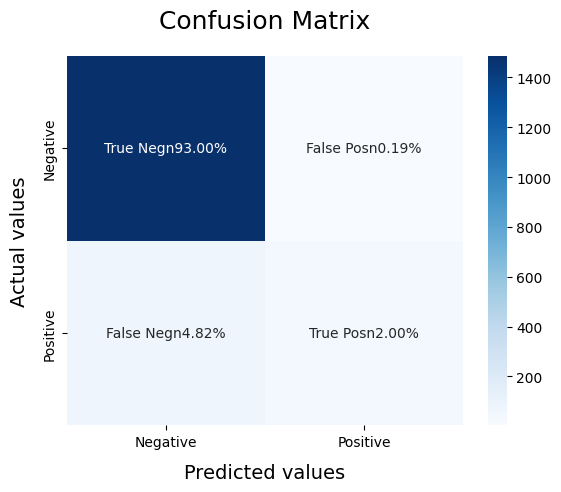

In [ ]:
# M3
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

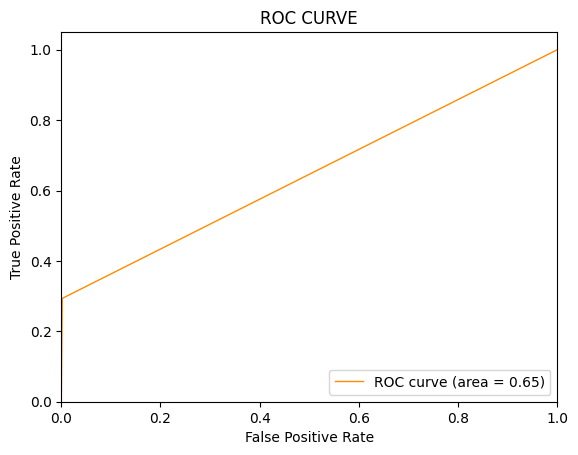

In [ ]:
# ROC-AUC Curve for model-3
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# **Model Evaluation**

Upon evaluating all the models, we can conclude the following details i.e.

Accuracy: As far as the accuracy of the model is concerned, Logistic Regression performs better than SVM, which in turn performs better than Bernoulli Naive Bayes.
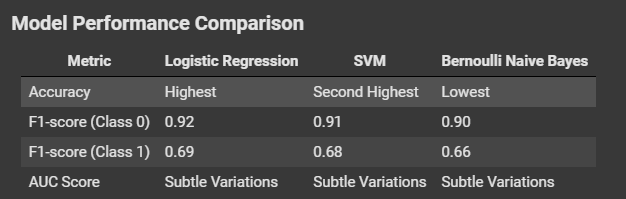

F1-score: The F1 Scores for class 0 and class 1 are :
(a) For class 0: Bernoulli Naive Bayes(accuracy = 0.90) < SVM (accuracy =0.91) < Logistic Regression (accuracy = 0.92)
(b) For class 1: Bernoulli Naive Bayes (accuracy = 0.66) < SVM (accuracy = 0.68) < Logistic Regression (accuracy = 0.69)

AUC Score: All three models have the same ROC-AUC score.

We, therefore, conclude that the Logistic Regression is the best model for the above-given dataset.

In our problem statement, Logistic Regression follows the principle of Occam’s Razor, which defines that for a particular problem statement, if the data has no assumption, then the simplest model works the best. Since our dataset does not have any assumptions and Logistic Regression is a simple model. Therefore, the concept holds true for the above-mentioned dataset.